In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None



import os
for dirname, _, filenames in os.walk('/Day-18/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [183]:
housing_df = pd.read_csv('/data/train.csv')
housing_test_df = pd.read_csv('/data/test.csv')
print(housing_df.shape)
print(housing_test_df.shape)

(1460, 81)
(1459, 80)


In [184]:
global cols

In [185]:
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [186]:
housing_df.drop('Id', axis=1, inplace=True)

In [187]:
housing_test_df.drop('Id', axis=1, inplace=True)

In [188]:
null_df = housing_df.isnull().sum()*100 / len(housing_df)
null_df[null_df.values > 25].index

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [189]:
housing_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [190]:
housing_test_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [194]:
null_df[(null_df.values > 0) & (null_df.values <= 25)]

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [195]:
housing_df.LotFrontage.fillna(housing_df.LotFrontage.median(), inplace=True)

In [196]:
housing_df.MasVnrArea.fillna(0, inplace=True)
housing_df.MasVnrType.fillna('None', inplace=True)
housing_df.GarageType.fillna('None', inplace=True)
housing_df.GarageYrBlt.fillna(0, inplace=True)
housing_df.GarageFinish.fillna('None', inplace=True)
housing_df.GarageQual.fillna('None', inplace=True)
housing_df.GarageCond.fillna('None', inplace=True)

In [197]:
housing_df.dropna(inplace=True)

In [198]:
housing_test_df.LotFrontage.fillna(housing_test_df.LotFrontage.median(), inplace=True)
housing_test_df.MasVnrArea.fillna(0, inplace=True)
housing_test_df.MasVnrType.fillna('None', inplace=True)
housing_test_df.GarageType.fillna('None', inplace=True)
housing_test_df.GarageYrBlt.fillna(0, inplace=True)
housing_test_df.GarageFinish.fillna('None', inplace=True)
housing_test_df.GarageQual.fillna('None', inplace=True)
housing_test_df.GarageCond.fillna('None', inplace=True)

In [200]:
null_df = housing_test_df.isnull().sum()*100 / len(housing_test_df)
temp1 = housing_test_df[null_df[null_df.values > 0].index].select_dtypes(exclude='object').columns
temp2 = housing_test_df[null_df[null_df.values > 0].index].select_dtypes(include='object').columns
print(temp1, temp2)

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageCars', 'GarageArea'],
      dtype='object') Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')


In [201]:
housing_test_df[temp1] = housing_test_df[temp1].fillna(0)
housing_test_df[temp2] = housing_test_df[temp2].fillna('none')

In [202]:
null_df = housing_test_df.isnull().sum()*100 / len(housing_test_df)
null_df[null_df.values > 0]

Series([], dtype: float64)

In [204]:
null_df = housing_df.isnull().sum()*100 / len(housing_df)
null_df[null_df.values > 0]

Series([], dtype: float64)

In [205]:
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count           mean           std      min       0%  \
MSSubClass     1420.0      56.799296     42.268545     20.0     20.0   
LotFrontage    1420.0      69.952817     22.276497     21.0     21.0   
LotArea        1420.0   10546.640845  10104.687606   1300.0   1300.0   
OverallQual    1420.0       6.145070      1.359361      1.0      1.0   
OverallCond    1420.0       5.591549      1.110238      1.0      1.0   
YearBuilt      1420.0    1971.582394     30.378484   1872.0   1872.0   
YearRemodAdd   1420.0    1985.281690     20.454376   1950.0   1950.0   
MasVnrArea     1420.0     104.773239    181.996947      0.0      0.0   
BsmtFinSF1     1420.0     455.345070    456.088615      0.0      0.0   
BsmtFinSF2     1420.0      47.523239    162.988333      0.0      0.0   
BsmtUnfSF      1420.0     581.160563    437.368171      0.0      0.0   
TotalBsmtSF    1420.0    1084.028873    405.512992    105.0    105.0   
1stFlrSF       1420.0    1164.236620    386.890940    438.0    438.0   
2ndFlrSF       1420.0     350.969718    437.894515      0.0      0.0   
LowQualFinSF   1420.0       5.971831     49.278050      0.0      0.0   
GrLivArea      1420.0    1521.178169    526.673125    438.0    438.0   
BsmtFullBath   1420.0       0.436620      0.521082      0.0      0.0   
BsmtHalfBath   1420.0       0.059155      0.241896      0.0      0.0   
FullBath       1420.0       1.562676      0.551391      0.0      0.0   
HalfBath       1420.0       0.392254      0.505442      0.0      0.0   
BedroomAbvGr   1420.0       2.866901      0.810365      0.0      0.0   
KitchenAbvGr   1420.0       1.036620      0.198826      0.0      0.0   
TotRmsAbvGrd   1420.0       6.520423      1.617036      3.0      3.0   
Fireplaces     1420.0       0.621831      0.645865      0.0      0.0   
GarageYrBlt    1420.0    1875.613380    440.596739      0.0      0.0   
GarageCars     1420.0       1.775352      0.743938      0.0      0.0   
GarageArea     1420.0     475.673944    213.103819      0.0      0.0   
WoodDeckSF     1420.0      96.102113    126.201172      0.0      0.0   
OpenPorchSF    1420.0      47.519718     66.718200      0.0      0.0   
EnclosedPorch  1420.0      22.035915     61.221897      0.0      0.0   
3SsnPorch      1420.0       3.378873     29.350260      0.0      0.0   
ScreenPorch    1420.0      15.485211     56.479653      0.0      0.0   
PoolArea       1420.0       2.836620     40.736940      0.0      0.0   
MiscVal        1420.0      41.052113    493.469419      0.0      0.0   
MoSold         1420.0       6.327465      2.712008      1.0      1.0   
YrSold         1420.0    2007.809859      1.326443   2006.0   2006.0   
SalePrice      1420.0  182811.119014  79424.562170  34900.0  34900.0   

                     1%        5%       10%        25%       50%        75%  \
MSSubClass        20.00     20.00      20.0      20.00      50.0      70.00   
LotFrontage       21.00     35.00      48.0      60.00      69.0      79.00   
LotArea         1680.00   3228.30    4992.8    7583.00    9500.0   11628.50   
OverallQual        3.00      4.00       5.0       5.00       6.0       7.00   
OverallCond        3.00      4.00       5.0       5.00       5.0       6.00   
YearBuilt       1898.38   1916.00    1924.0    1954.00    1973.5    2001.00   
YearRemodAdd    1950.00   1950.00    1950.0    1968.00    1994.0    2004.00   
MasVnrArea         0.00      0.00       0.0       0.00       0.0     168.00   
BsmtFinSF1         0.00      0.00       0.0       0.00     400.0     725.00   
BsmtFinSF2         0.00      0.00       0.0       0.00       0.0       0.00   
BsmtUnfSF          0.00      0.00      95.9     247.00     490.0     813.25   
TotalBsmtSF      384.00    588.00     672.0     810.75    1004.5    1309.25   
1stFlrSF         525.19    678.85     763.6     882.00    1088.0    1392.00   
2ndFlrSF           0.00      0.00       0.0       0.00       0.0     732.50   
LowQualFinSF       0.00      0.00       0.0       0.00       0.0       0.00   
GrLivArea      

In [206]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [207]:
drop_cols = ['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','Functional','PavedDrive','GarageCond','GarageQual','LandContour']
housing_df.drop(columns=drop_cols, inplace=True)
housing_test_df.drop(columns=drop_cols, inplace=True)

In [208]:
housing_df.MSZoning = housing_df.MSZoning.apply(lambda x: 'other' if x not in ('RL','RM') else x)
housing_df.LotShape = housing_df.LotShape.apply(lambda x: 'other' if x not in ('Reg','IR1') else x)
housing_df.LotConfig = housing_df.LotConfig.apply(lambda x: 'other' if x not in ('Inside','Corner') else x)
housing_df.Condition1 = housing_df.Condition1.apply(lambda x: 'other' if x not in ('Norm') else x)
housing_df.BldgType = housing_df.BldgType.apply(lambda x: 'other' if x not in ('1Fam') else x)
housing_df.HouseStyle = housing_df.HouseStyle.apply(lambda x: 'other' if x not in ('1Story','2Story','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.Exterior1st = housing_df.Exterior1st.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.Exterior2nd = housing_df.Exterior2nd.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.MasVnrType = housing_df.MasVnrType.apply(lambda x: 'other' if x not in ('None','none','BrkFace') else x)
housing_df.ExterQual = housing_df.ExterQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.ExterCond = housing_df.ExterCond.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.Foundation = housing_df.Foundation.apply(lambda x: 'other' if x not in ('PConc','CBlock','BrkTil') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtExposure = housing_df.BsmtExposure.apply(lambda x: 'other' if x not in ('No','Av') else x)
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.apply(lambda x: 'other' if x not in ('Unf','GLQ','ALQ','BLQ') else x)
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.apply(lambda x: 'other' if x not in ('Unf') else x)
housing_df.HeatingQC = housing_df.HeatingQC.apply(lambda x: 'other' if x not in ('Ex','TA') else x)
housing_df.KitchenQual = housing_df.KitchenQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.SaleType = housing_df.SaleType.apply(lambda x: 'other' if x not in ('WD') else x)
housing_df.SaleCondition = housing_df.SaleCondition.apply(lambda x: 'other' if x not in ('Normal') else x)

In [209]:
housing_test_df.MSZoning = housing_test_df.MSZoning.apply(lambda x: 'other' if x not in ('RL','RM') else x)
housing_test_df.LotShape = housing_test_df.LotShape.apply(lambda x: 'other' if x not in ('Reg','IR1') else x)
housing_test_df.LotConfig = housing_test_df.LotConfig.apply(lambda x: 'other' if x not in ('Inside','Corner') else x)
housing_test_df.Condition1 = housing_test_df.Condition1.apply(lambda x: 'other' if x not in ('Norm') else x)
housing_test_df.BldgType = housing_test_df.BldgType.apply(lambda x: 'other' if x not in ('1Fam') else x)
housing_test_df.HouseStyle = housing_test_df.HouseStyle.apply(lambda x: 'other' if x not in ('1Story','2Story','1.5Fin') else x)
housing_test_df.RoofStyle = housing_test_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_test_df.RoofStyle = housing_test_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_test_df.RoofStyle = housing_test_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_test_df.Exterior1st = housing_test_df.Exterior1st.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_test_df.Exterior2nd = housing_test_df.Exterior2nd.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_test_df.MasVnrType = housing_test_df.MasVnrType.apply(lambda x: 'other' if x not in ('None','none','BrkFace') else x)
housing_test_df.ExterQual = housing_test_df.ExterQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_test_df.ExterCond = housing_test_df.ExterCond.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_test_df.Foundation = housing_test_df.Foundation.apply(lambda x: 'other' if x not in ('PConc','CBlock','BrkTil') else x)
housing_test_df.BsmtQual = housing_test_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_test_df.BsmtQual = housing_test_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_test_df.BsmtExposure = housing_test_df.BsmtExposure.apply(lambda x: 'other' if x not in ('No','Av') else x)
housing_test_df.BsmtFinType1 = housing_test_df.BsmtFinType1.apply(lambda x: 'other' if x not in ('Unf','GLQ','ALQ','BLQ') else x)
housing_test_df.BsmtFinType2 = housing_test_df.BsmtFinType2.apply(lambda x: 'other' if x not in ('Unf') else x)
housing_test_df.HeatingQC = housing_test_df.HeatingQC.apply(lambda x: 'other' if x not in ('Ex','TA') else x)
housing_test_df.KitchenQual = housing_test_df.KitchenQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_test_df.GarageType = housing_test_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_test_df.GarageType = housing_test_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_test_df.SaleType = housing_test_df.SaleType.apply(lambda x: 'other' if x not in ('WD') else x)
housing_test_df.SaleCondition = housing_test_df.SaleCondition.apply(lambda x: 'other' if x not in ('Normal') else x)

In [210]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [211]:
housing_df.insert(0, 'HouseAge', housing_df.YrSold - housing_df.YearBuilt)
housing_df.insert(0, 'HouseRemodAddAge', housing_df.YrSold - housing_df.YearRemodAdd)
housing_df.insert(0, 'GarageAge', housing_df.YrSold - housing_df.GarageYrBlt)

In [212]:
housing_test_df.insert(0, 'HouseAge', housing_test_df.YrSold - housing_test_df.YearBuilt)
housing_test_df.insert(0, 'HouseRemodAddAge', housing_test_df.YrSold - housing_test_df.YearRemodAdd)
housing_test_df.insert(0, 'GarageAge', housing_test_df.YrSold - housing_test_df.GarageYrBlt)

In [214]:
housing_df.columns[housing_df.isnull().sum()>0]

Index([], dtype='object')

In [215]:
housing_test_df.columns[housing_test_df.isnull().sum()>0]

Index([], dtype='object')

In [216]:
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count           mean           std      min       0%  \
GarageAge         1420.0     132.196479    440.614948      0.0      0.0   
HouseRemodAddAge  1420.0      22.528169     20.457038     -1.0     -1.0   
HouseAge          1420.0      36.227465     30.425750      0.0      0.0   
MSSubClass        1420.0      56.799296     42.268545     20.0     20.0   
LotFrontage       1420.0      69.952817     22.276497     21.0     21.0   
LotArea           1420.0   10546.640845  10104.687606   1300.0   1300.0   
OverallQual       1420.0       6.145070      1.359361      1.0      1.0   
OverallCond       1420.0       5.591549      1.110238      1.0      1.0   
YearBuilt         1420.0    1971.582394     30.378484   1872.0   1872.0   
YearRemodAdd      1420.0    1985.281690     20.454376   1950.0   1950.0   
MasVnrArea        1420.0     104.773239    181.996947      0.0      0.0   
BsmtFinSF1        1420.0     455.345070    456.088615      0.0      0.0   
BsmtFinSF2        1420.0      47.523239    162.988333      0.0      0.0   
BsmtUnfSF         1420.0     581.160563    437.368171      0.0      0.0   
TotalBsmtSF       1420.0    1084.028873    405.512992    105.0    105.0   
1stFlrSF          1420.0    1164.236620    386.890940    438.0    438.0   
2ndFlrSF          1420.0     350.969718    437.894515      0.0      0.0   
LowQualFinSF      1420.0       5.971831     49.278050      0.0      0.0   
GrLivArea         1420.0    1521.178169    526.673125    438.0    438.0   
BsmtFullBath      1420.0       0.436620      0.521082      0.0      0.0   
BsmtHalfBath      1420.0       0.059155      0.241896      0.0      0.0   
FullBath          1420.0       1.562676      0.551391      0.0      0.0   
HalfBath          1420.0       0.392254      0.505442      0.0      0.0   
BedroomAbvGr      1420.0       2.866901      0.810365      0.0      0.0   
KitchenAbvGr      1420.0       1.036620      0.198826      0.0      0.0   
TotRmsAbvGrd      1420.0       6.520423      1.617036      3.0      3.0   
Fireplaces        1420.0       0.621831      0.645865      0.0      0.0   
GarageYrBlt       1420.0    1875.613380    440.596739      0.0      0.0   
GarageCars        1420.0       1.775352      0.743938      0.0      0.0   
GarageArea        1420.0     475.673944    213.103819      0.0      0.0   
WoodDeckSF        1420.0      96.102113    126.201172      0.0      0.0   
OpenPorchSF       1420.0      47.519718     66.718200      0.0      0.0   
EnclosedPorch     1420.0      22.035915     61.221897      0.0      0.0   
3SsnPorch         1420.0       3.378873     29.350260      0.0      0.0   
ScreenPorch       1420.0      15.485211     56.479653      0.0      0.0   
PoolArea          1420.0       2.836620     40.736940      0.0      0.0   
MiscVal           1420.0      41.052113    493.469419      0.0      0.0   
MoSold            1420.0       6.327465      2.712008      1.0      1.0   
YrSold            1420.0    2007.809859      1.326443   2006.0   2006.0   
SalePrice         1420.0  182811.119014  79424.562170  34900.0  34900.0   

                        1%        5%       10%        25%       50%  \
GarageAge             0.00      0.00       1.0       7.00      30.0   
HouseRemodAddAge      0.00      0.00       1.0       4.00      14.0   
HouseAge              0.00      1.00       1.0       7.00      34.0   
MSSubClass           20.00     20.00      20.0      20.00      50.0   
LotFrontage          21.00     35.00      48.0      60.00      69.0   
LotArea            1680.00   3228.30    4992.8    7583.00    9500.0   
OverallQual           3.00      4.00       5.0       5.00       6.0   
OverallCond           3.00      4.00       5.0       5.00       5.0   
YearBuilt          1898.38   1916.00    1924.0    1954.00    1973.5   
YearRemodAdd       1950.00   1950.00    1950.0    1968.00    1994.0   
MasVnrArea            0.00      0.00       0.0       0.00       0.0   
BsmtFinSF1            0.00      0.00       0.0       0.00     400.0   
BsmtFinSF2          

In [217]:
housing_df = housing_df.loc[housing_df.HouseRemodAddAge > 0]

In [218]:
housing_df.loc[housing_df.GarageAge > 200,['GarageYrBlt','YrSold','GarageAge']]

GarageYrBlt  YrSold  GarageAge
48            0.0    2009     2009.0
78            0.0    2010     2010.0
88            0.0    2009     2009.0
89            0.0    2007     2007.0
99            0.0    2010     2010.0
108           0.0    2007     2007.0
125           0.0    2006     2006.0
127           0.0    2007     2007.0
140           0.0    2010     2010.0
148           0.0    2008     2008.0
155           0.0    2008     2008.0
163           0.0    2007     2007.0
165           0.0    2008     2008.0
198           0.0    2009     2009.0
210           0.0    2008     2008.0
241           0.0    2007     2007.0
250           0.0    2010     2010.0
287           0.0    2006     2006.0
291           0.0    2008     2008.0
307           0.0    2008     2008.0
375           0.0    2009     2009.0
386           0.0    2006     2006.0
393           0.0    2006     2006.0
431           0.0    2008     2008.0
434           0.0    2008     2008.0
441           0.0    2008     2008.0
464           0.0    2009     2009.0
495           0.0    2009     2009.0
528           0.0    2007     2007.0
535           0.0    2008     2008.0
562           0.0    2008     2008.0
582           0.0    2007     2007.0
614           0.0    2010     2010.0
620           0.0    2008     2008.0
635           0.0    2007     2007.0
636           0.0    2009     2009.0
638           0.0    2008     2008.0
649           0.0    2007     2007.0
710           0.0    2008     2008.0
738           0.0    2009     2009.0
750           0.0    2010     2010.0
784           0.0    2008     2008.0
826           0.0    2008     2008.0
843           0.0    2007     2007.0
921           0.0    2008     2008.0
942           0.0    2007     2007.0
954           0.0    2006     2006.0
960           0.0    2010     2010.0
968           0.0    2009     2009.0
970           0.0    2006     2006.0
976           0.0    2006     2006.0
1009          0.0    2006     2006.0
1030          0.0    2006     2006.0
1038          0.0    2009     2009.0
1096          0.0    2007     2007.0
1123          0.0    2009     2009.0
1131          0.0    2007     2007.0
1137          0.0    2010     2010.0
1143          0.0    2008     2008.0
1173          0.0    2007     2007.0
1219          0.0    2006     2006.0
1234          0.0    2008     2008.0
1257          0.0    2009     2009.0
1283          0.0    2010     2010.0
1323          0.0    2009     2009.0
1325          0.0    2008     2008.0
1326          0.0    2007     2007.0
1337          0.0    2006     2006.0
1349          0.0    2008     2008.0
1407          0.0    2009     2009.0
1449          0.0    2006     2006.0
1450          0.0    2009     2009.0

In [219]:
housing_df.loc[housing_df.GarageAge > 200,'GarageAge'] = 0

In [220]:
housing_test_df.loc[housing_test_df.GarageAge > 200,'GarageAge'] = 0

In [222]:
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count           mean           std      min       0%  \
GarageAge         1295.0      30.010039     24.673398      0.0      0.0   
HouseRemodAddAge  1295.0      24.703475     20.127571      1.0      1.0   
HouseAge          1295.0      39.407722     29.741165      1.0      1.0   
MSSubClass        1295.0      57.409266     42.480863     20.0     20.0   
LotFrontage       1295.0      69.184556     21.167889     21.0     21.0   
LotArea           1295.0   10480.217761  10368.162962   1300.0   1300.0   
OverallQual       1295.0       6.013127      1.297595      1.0      1.0   
OverallCond       1295.0       5.633977      1.131434      1.0      1.0   
YearBuilt         1295.0    1968.460232     29.760841   1872.0   1872.0   
YearRemodAdd      1295.0    1983.164479     20.191547   1950.0   1950.0   
MasVnrArea        1295.0      96.287259    173.549010      0.0      0.0   
BsmtFinSF1        1295.0     448.290347    411.836161      0.0      0.0   
BsmtFinSF2        1295.0      52.110425    169.976945      0.0      0.0   
BsmtUnfSF         1295.0     551.272587    413.142506      0.0      0.0   
TotalBsmtSF       1295.0    1051.673359    364.543763    105.0    105.0   
1stFlrSF          1295.0    1138.589189    361.646804    438.0    438.0   
2ndFlrSF          1295.0     350.731274    432.423368      0.0      0.0   
LowQualFinSF      1295.0       6.548263     51.566697      0.0      0.0   
GrLivArea         1295.0    1495.868726    507.166456    438.0    438.0   
BsmtFullBath      1295.0       0.438610      0.522204      0.0      0.0   
BsmtHalfBath      1295.0       0.061004      0.242636      0.0      0.0   
FullBath          1295.0       1.523552      0.544064      0.0      0.0   
HalfBath          1295.0       0.386100      0.504194      0.0      0.0   
BedroomAbvGr      1295.0       2.878764      0.813319      0.0      0.0   
KitchenAbvGr      1295.0       1.040154      0.207867      0.0      0.0   
TotRmsAbvGrd      1295.0       6.455598      1.584604      3.0      3.0   
Fireplaces        1295.0       0.613900      0.651327      0.0      0.0   
GarageYrBlt       1295.0    1866.220849    453.599496      0.0      0.0   
GarageCars        1295.0       1.711969      0.723616      0.0      0.0   
GarageArea        1295.0     456.983012    201.799029      0.0      0.0   
WoodDeckSF        1295.0      95.474903    128.516253      0.0      0.0   
OpenPorchSF       1295.0      43.874903     64.760990      0.0      0.0   
EnclosedPorch     1295.0      24.047876     63.667516      0.0      0.0   
3SsnPorch         1295.0       3.204633     28.899372      0.0      0.0   
ScreenPorch       1295.0      15.802317     57.188599      0.0      0.0   
PoolArea          1295.0       2.739768     40.534807      0.0      0.0   
MiscVal           1295.0      45.014672    516.581791      0.0      0.0   
MoSold            1295.0       6.233977      2.678569      1.0      1.0   
YrSold            1295.0    2007.867954      1.324604   2006.0   2006.0   
SalePrice         1295.0  174576.928958  71234.571685  34900.0  34900.0   

                        1%       5%       10%       25%       50%       75%  \
GarageAge             0.00      0.0       2.0       7.0      29.0      47.0   
HouseRemodAddAge      1.00      1.0       2.0       6.0      17.0      42.0   
HouseAge              1.00      2.0       4.0      11.0      37.0      57.0   
MSSubClass           20.00     20.0      20.0      20.0      50.0      70.0   
LotFrontage          21.00     35.0      48.0      60.0      69.0      78.0   
LotArea            1680.00   3182.0    5000.0    7500.0    9430.0   11475.0   
OverallQual           3.00      4.0       5.0       5.0       6.0       7.0   
OverallCond           3.00      4.0       5.0       5.0       5.0       6.0   
YearBuilt          1892.94   1915.0    1922.4    1951.0    1970.0    1997.0   
YearRemodAdd       1950.00   1950.0    1950.0    1965.0    1990.0    2002.0   
MasVnrArea            0.00      0.0       0.0       0.0       0.0     152.

In [223]:
housing_test_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count         mean          std     min      0%       1%  \
GarageAge         1459.0    28.439342    26.628669  -200.0  -200.0     0.00   
HouseRemodAddAge  1459.0    24.106923    21.131883    -2.0    -2.0     0.00   
HouseAge          1459.0    36.411926    30.432248    -1.0    -1.0     0.00   
MSSubClass        1459.0    57.378341    42.746880    20.0    20.0    20.00   
LotFrontage       1459.0    68.334476    20.569211    21.0    21.0    21.00   
LotArea           1459.0  9819.161069  4955.517327  1470.0  1470.0  1680.00   
OverallQual       1459.0     6.078821     1.436812     1.0     1.0     3.00   
OverallCond       1459.0     5.553804     1.113740     1.0     1.0     3.00   
YearBuilt         1459.0  1971.357779    30.390071  1879.0  1879.0  1900.00   
YearRemodAdd      1459.0  1983.662783    21.130467  1950.0  1950.0  1950.00   
MasVnrArea        1459.0    99.673749   177.001792     0.0     0.0     0.00   
BsmtFinSF1        1459.0   438.902673   455.257119     0.0     0.0     0.00   
BsmtFinSF2        1459.0    52.583276   176.698671     0.0     0.0     0.00   
BsmtUnfSF         1459.0   553.915010   437.351324     0.0     0.0     0.00   
TotalBsmtSF       1459.0  1045.400960   443.592976     0.0     0.0     0.00   
1stFlrSF          1459.0  1156.534613   398.165820   407.0   407.0   510.12   
2ndFlrSF          1459.0   325.967786   420.610226     0.0     0.0     0.00   
LowQualFinSF      1459.0     3.543523    44.043251     0.0     0.0     0.00   
GrLivArea         1459.0  1486.045922   485.566099   407.0   407.0   672.00   
BsmtFullBath      1459.0     0.433859     0.530527     0.0     0.0     0.00   
BsmtHalfBath      1459.0     0.065113     0.252307     0.0     0.0     0.00   
FullBath          1459.0     1.570939     0.555190     0.0     0.0     1.00   
HalfBath          1459.0     0.377656     0.503017     0.0     0.0     0.00   
BedroomAbvGr      1459.0     2.854010     0.829788     0.0     0.0     1.00   
KitchenAbvGr      1459.0     1.042495     0.208472     0.0     0.0     1.00   
TotRmsAbvGrd      1459.0     6.385195     1.508895     3.0     3.0     4.00   
Fireplaces        1459.0     0.581220     0.647420     0.0     0.0     0.00   
GarageYrBlt       1459.0  1871.989719   445.786118     0.0     0.0     0.00   
GarageCars        1459.0     1.764907     0.777056     0.0     0.0     0.00   
GarageArea        1459.0   472.444825   217.326902     0.0     0.0     0.00   
WoodDeckSF        1459.0    93.174777   127.744882     0.0     0.0     0.00   
OpenPorchSF       1459.0    48.313914    68.883364     0.0     0.0     0.00   
EnclosedPorch     1459.0    24.243317    67.227765     0.0     0.0     0.00   
3SsnPorch         1459.0     1.794380    20.207842     0.0     0.0     0.00   
ScreenPorch       1459.0    17.064428    56.609763     0.0     0.0     0.00   
PoolArea          1459.0     1.744345    30.491646     0.0     0.0     0.00   
MiscVal           1459.0    58.167923   630.806978     0.0     0.0     0.00   
MoSold            1459.0     6.104181     2.722432     1.0     1.0     1.00   
YrSold            1459.0  2007.769705     1.301740  2006.0  2006.0  2006.00   

                      5%     10%     25%     50%      75%      90%      95%  \
GarageAge            0.0     0.8     5.0    26.0     48.0     65.0     80.1   
HouseRemodAddAge     0.0     1.0     4.0    16.0     44.0     56.0     58.0   
HouseAge             1.0     1.0     7.0    34.0     55.0     83.2     93.0   
MSSubClass          20.0    20.0    20.0    50.0     70.0    120.0    160.0   
LotFrontage         33.0    45.0    60.0    67.0     78.0     91.0    105.0   
LotArea           3085.5  4793.0  7391.0  9399.0  11517.5  14259.0  16873.0   
OverallQual          4.0     5.0     5.0     6.0      7.0      8.0      9.0   
OverallCond          4.0     5.0     5.0     5.0      6.0      7.0      8.0   
YearBuilt         1915.0  1924.0  1953.0  1973.0   2001.0   2006.0   2007.0   
YearRemodAdd      1950.0  1950.0  1963.0  1992.0   2004.0   2007.0  

In [224]:
housing_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], index=1, inplace=True)
housing_df.head()

/tmp/ipykernel_32/105738061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], index=1, inplace=True)


GarageAge  HouseRemodAddAge  HouseAge  MSSubClass MSZoning  LotFrontage  \
0        5.0                 5         5          60       RL         65.0   
2        7.0                 6         7          60       RL         68.0   
3        8.0                36        91          70       RL         60.0   
4        8.0                 8         8          60       RL         84.0   
5       16.0                14        16          50       RL         85.0   

   LotArea LotShape LotConfig Neighborhood Condition1 BldgType HouseStyle  \
0     8450      Reg    Inside      CollgCr       Norm     1Fam     2Story   
2    11250      IR1    Inside      CollgCr       Norm     1Fam     2Story   
3     9550      IR1    Corner      Crawfor       Norm     1Fam     2Story   
4    14260      IR1     other      NoRidge       Norm     1Fam     2Story   
5    14115      IR1    Inside      Mitchel       Norm     1Fam     1.5Fin   

   OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            7            5     Gable     VinylSd     VinylSd    BrkFace   
2            7            5     Gable     VinylSd     VinylSd    BrkFace   
3            7            5     Gable     Wd Sdng       other       None   
4            8            5     Gable     VinylSd     VinylSd    BrkFace   
5            5            5     Gable     VinylSd     VinylSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
2       162.0        Gd        TA      PConc       Gd       TA        other   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA      other       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   
5          GLQ         732          Unf           0         64          796   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710             1   
2        Ex       920       866             0       1786             1   
3     other       961       756             0       1717             1   
4        Ex      1145      1053             0       2198             1   
5        Ex       796       566             0       1362             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   
5             0         1         1             1             1          TA   

   TotRmsAbvGrd  Fireplaces GarageType GarageFinish  GarageCars  GarageArea  \
0             8           0     Attchd          RFn           2         548   
2             6           1     Attchd          RFn           2         608   
3             7           1     Detchd          Unf           3         642   
4             9           1     Attchd          RFn           3         836   
5             5           0     Attchd          Unf           2         480   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35      

In [ ]:
housing_test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], index=1, inplace=True)

In [106]:
housing_df.drop(['Neighborhood','PoolArea'], inplace=True, axis=1)
housing_test_df.drop(['Neighborhood','PoolArea'], inplace=True, axis=1)

/tmp/ipykernel_32/2412287235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.drop(['Neighborhood','PoolArea'], inplace=True, axis=1)


In [107]:
cat_cols = housing_df.select_dtypes(include='object').columns
num_cols = housing_df.select_dtypes(exclude='object').columns

In [108]:
print(cat_cols)
test_cat_cols = housing_test_df.select_dtypes(include='object').columns
print(test_cat_cols)

Index(['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')
Index(['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [109]:
num_cols

Index(['GarageAge', 'HouseRemodAddAge', 'HouseAge', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'SalePrice'],
      dtype='object')

In [110]:
test_num_cols = housing_test_df.select_dtypes(exclude='object').columns
test_num_cols

Index(['GarageAge', 'HouseRemodAddAge', 'HouseAge', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold'],
      dtype='object')

In [111]:
for i in num_cols[:-1]:
    housing_df.loc[housing_df[i] >= np.percentile(housing_df[i], 99),i] = np.percentile(housing_df[i], 99)
    housing_test_df.loc[housing_test_df[i] >= np.percentile(housing_df[i], 99),i] = np.percentile(housing_df[i], 99)

In [112]:
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count           mean           std      min       0%  \
GarageAge         1294.0      29.956654     24.542648      0.0      0.0   
HouseRemodAddAge  1294.0      24.698609     20.134591      1.0      1.0   
HouseAge          1294.0      39.305958     29.451685      1.0      1.0   
MSSubClass        1294.0      57.438176     42.484541     20.0     20.0   
LotFrontage       1294.0      68.876283     19.463036     21.0     21.0   
LotArea           1294.0    9981.247790   5032.006978   1300.0   1300.0   
OverallQual       1294.0       6.004637      1.275012      1.0      1.0   
OverallCond       1294.0       5.632148      1.129956      1.0      1.0   
MasVnrArea        1294.0      93.090155    156.458217      0.0      0.0   
BsmtFinSF1        1294.0     445.796971    405.673357      0.0      0.0   
BsmtFinSF2        1294.0      50.158988    158.315970      0.0      0.0   
BsmtUnfSF         1294.0     549.600193    406.980375      0.0      0.0   
TotalBsmtSF       1294.0    1048.224621    351.769645    105.0    105.0   
1stFlrSF          1294.0    1135.561059    350.709595    438.0    438.0   
2ndFlrSF          1294.0     348.433617    425.179710      0.0      0.0   
LowQualFinSF      1294.0       5.608060     42.935075      0.0      0.0   
GrLivArea         1294.0    1491.804219    490.261378    438.0    438.0   
BsmtFullBath      1294.0       0.438176      0.519201      0.0      0.0   
BsmtHalfBath      1294.0       0.059505      0.236660      0.0      0.0   
FullBath          1294.0       1.523184      0.544113      0.0      0.0   
HalfBath          1294.0       0.377898      0.485049      0.0      0.0   
BedroomAbvGr      1294.0       2.871716      0.787914      0.0      0.0   
KitchenAbvGr      1294.0       1.038640      0.196780      0.0      0.0   
TotRmsAbvGrd      1294.0       6.447450      1.556347      3.0      3.0   
Fireplaces        1294.0       0.610510      0.642463      0.0      0.0   
GarageCars        1294.0       1.707883      0.714224      0.0      0.0   
GarageArea        1294.0     455.848470    198.538682      0.0      0.0   
WoodDeckSF        1294.0      94.156461    123.686213      0.0      0.0   
OpenPorchSF       1294.0      43.089436     60.398613      0.0      0.0   
EnclosedPorch     1294.0      23.517496     60.887805      0.0      0.0   
3SsnPorch         1294.0       2.262334     18.650372      0.0      0.0   
ScreenPorch       1294.0      15.043841     52.661616      0.0      0.0   
MiscVal           1294.0      20.513138    107.094494      0.0      0.0   
MoSold            1294.0       6.234930      2.679385      1.0      1.0   
SalePrice         1294.0  174571.578825  71261.852315  34900.0  34900.0   

                        1%        5%       10%        25%       50%  \
GarageAge             0.00      0.00       2.0       7.00      29.0   
HouseRemodAddAge      1.00      1.00       2.0       6.00      17.0   
HouseAge              1.00      2.00       4.0      11.00      37.0   
MSSubClass           20.00     20.00      20.0      20.00      50.0   
LotFrontage          21.00     35.00      48.0      60.00      69.0   
LotArea            1680.00   3182.00    5000.0    7500.00    9417.5   
OverallQual           3.00      4.00       5.0       5.00       6.0   
OverallCond           3.00      4.00       5.0       5.00       5.0   
MasVnrArea            0.00      0.00       0.0       0.00       0.0   
BsmtFinSF1            0.00      0.00       0.0       0.00     406.5   
BsmtFinSF2            0.00      0.00       0.0       0.00       0.0   
BsmtUnfSF             0.00      0.00      90.0     230.00     471.5   
TotalBsmtSF         384.00    581.85     672.0     800.00     979.5   
1stFlrSF            520.00    674.95     757.0     869.00    1064.5   
2ndFlrSF              0.00      0.00       0.0       0.00       0.0   
LowQualFinSF          0.00      0.00       0.0       0.00       0.0   
GrLivArea           689.67    848.00     901.3    1116.25    1442.0   
BsmtFullBath          0.00      0.00    

In [113]:
housing_test_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count         mean          std     min      0%       1%  \
GarageAge         1458.0    28.289512    26.277483  -200.0  -200.0     0.00   
HouseRemodAddAge  1458.0    24.087791    21.126490    -2.0    -2.0     0.00   
HouseAge          1458.0    36.366279    30.344711    -1.0    -1.0     0.00   
MSSubClass        1458.0    57.403978    42.750325    20.0    20.0    20.00   
LotFrontage       1458.0    68.179725    19.924193    21.0    21.0    21.00   
LotArea           1458.0  9755.669984  4532.361772  1470.0  1470.0  1680.00   
OverallQual       1458.0     6.069959     1.415878     1.0     1.0     3.00   
OverallCond       1458.0     5.553498     1.114060     1.0     1.0     3.00   
MasVnrArea        1458.0    96.564249   162.395487     0.0     0.0     0.00   
BsmtFinSF1        1458.0   430.584698   428.453558     0.0     0.0     0.00   
BsmtFinSF2        1458.0    50.594842   165.042526     0.0     0.0     0.00   
BsmtUnfSF         1458.0   552.735960   433.634287     0.0     0.0     0.00   
TotalBsmtSF       1458.0  1039.564074   420.916511     0.0     0.0     0.00   
1stFlrSF          1458.0  1149.967206   369.424309   407.0   407.0   509.98   
2ndFlrSF          1458.0   323.653588   413.299050     0.0     0.0     0.00   
LowQualFinSF      1458.0     2.610687    28.750535     0.0     0.0     0.00   
GrLivArea         1458.0  1483.378352   472.724877   407.0   407.0   672.00   
BsmtFullBath      1458.0     0.433471     0.527908     0.0     0.0     0.00   
BsmtHalfBath      1458.0     0.063786     0.244455     0.0     0.0     0.00   
FullBath          1458.0     1.568587     0.545551     0.0     0.0     1.00   
HalfBath          1458.0     0.368313     0.482512     0.0     0.0     0.00   
BedroomAbvGr      1458.0     2.844307     0.798788     0.0     0.0     1.00   
KitchenAbvGr      1458.0     1.042524     0.208540     0.0     0.0     1.00   
TotRmsAbvGrd      1458.0     6.377915     1.480314     3.0     3.0     4.00   
Fireplaces        1458.0     0.576132     0.629873     0.0     0.0     0.00   
GarageCars        1458.0     1.756516     0.755925     0.0     0.0     0.00   
GarageArea        1458.0   469.319817   208.400846     0.0     0.0     0.00   
WoodDeckSF        1458.0    91.441257   119.309111     0.0     0.0     0.00   
OpenPorchSF       1458.0    47.176410    62.730012     0.0     0.0     0.00   
EnclosedPorch     1458.0    22.980311    58.241670     0.0     0.0     0.00   
3SsnPorch         1458.0     1.343097    14.313677     0.0     0.0     0.00   
ScreenPorch       1458.0    16.561809    53.277709     0.0     0.0     0.00   
MiscVal           1458.0    19.276406   105.704687     0.0     0.0     0.00   
MoSold            1458.0     6.104252     2.723365     1.0     1.0     1.00   

                       5%     10%      25%     50%       75%      90%  \
GarageAge            0.00     0.7     5.00    26.0     47.75     65.0   
HouseRemodAddAge     0.00     1.0     4.00    16.0     44.00     56.0   
HouseAge             1.00     1.0     7.00    34.0     55.00     83.3   
MSSubClass          20.00    20.0    20.00    50.0     70.00    120.0   
LotFrontage         33.00    45.0    60.00    67.0     78.00     91.0   
LotArea           3084.75  4789.5  7390.50  9395.5  11511.25  14252.1   
OverallQual          4.00     5.0     5.00     6.0      7.00      8.0   
OverallCond          4.00     5.0     5.00     5.0      6.00      7.0   
MasVnrArea           0.00     0.0     0.00     0.0    162.00    309.3   
BsmtFinSF1           0.00     0.0     0.00   350.0    748.75   1039.8   
BsmtFinSF2           0.00     0.0     0.00     0.0      0.00    139.8   
BsmtUnfSF            0.00    47.4   219.00   460.0    797.75   1195.9   
TotalBsmtSF        390.95   561.0   784.00   988.0   1302.00   1615.6   
1stFlrSF           630.00   738.0   873.25  1079.0   1382.75   1671.0   
2ndFlrSF             0.00     0.0     0.00     0.0    676.00    908.6   
LowQualFinSF         0.00     0.0     0.00     0.0      0.00      0.0   
GrLivArea   

In [114]:
dummies_df = housing_df[num_cols]
for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True, prefix=i, prefix_sep='.', dtype='int')
    #print(temp)
    dummies_df = pd.concat([dummies_df, temp], axis=1)
dummies_df.shape

(1294, 88)

In [115]:
test_dummies_df = housing_test_df[num_cols[:-1]]
for i in cat_cols:
    temp_test = pd.get_dummies(housing_test_df[i],drop_first=True, prefix=i, prefix_sep='.', dtype='int')
    #print(temp)
    test_dummies_df = pd.concat([test_dummies_df, temp_test], axis=1)
test_dummies_df.shape

(1458, 88)

In [119]:
dummies_df.head()

GarageAge  HouseRemodAddAge  HouseAge  MSSubClass  LotFrontage  LotArea  \
0        5.0                 5       5.0          60         65.0   8450.0   
2        7.0                 6       7.0          60         68.0  11250.0   
3        8.0                36      91.0          70         60.0   9550.0   
4        8.0                 8       8.0          60         84.0  14260.0   
5       16.0                14      16.0          50         85.0  14115.0   

   OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            7            5       196.0       706.0         0.0      150.0   
2            7            5       162.0       486.0         0.0      434.0   
3            7            5         0.0       216.0         0.0      540.0   
4            8            5       350.0       655.0         0.0      490.0   
5            5            5         0.0       732.0         0.0       64.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        856.0     856.0     854.0           0.0     1710.0             1   
2        920.0     920.0     866.0           0.0     1786.0             1   
3        756.0     961.0     756.0           0.0     1717.0             1   
4       1145.0    1145.0    1053.0           0.0     2198.0             1   
5        796.0     796.0     566.0           0.0     1362.0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   
5             0         1         1             1             1             5   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2       548.0         0.0         61.0           0.00   
2           1           2       608.0         0.0         42.0           0.00   
3           1           3       642.0         0.0         35.0         264.28   
4           1           3       836.0       192.0         84.0           0.00   
5           0           2       480.0        40.0         30.0           0.00   

   3SsnPorch  ScreenPorch  MiscVal  MoSold  SalePrice  MSZoning.RM  \
0       0.00          0.0        0       2     208500            0   
2       0.00          0.0        0       9     223500            0   
3       0.00          0.0        0       2     140000            0   
4       0.00          0.0        0      12     250000            0   
5     162.42          0.0      700      10     143000            0   

   MSZoning.other  LotShape.Reg  LotShape.other  LotConfig.Inside  \
0               0             1               0                 1   
2               0             0               0                 1   
3               0             0               0                 0   
4               0             0               0                 0   
5               0             0               0                 1   

   LotConfig.other  Condition1.other  BldgType.other  HouseStyle.1Story  \
0                0                 0               0                  0   
2                0                 0               0                  0   
3                0                 0               0                  0   
4                1                 0               0                  0   
5                0                 0               0                  0   

   HouseStyle.2Story  HouseStyle.other  RoofStyle.Hip  RoofStyle.other  \
0                  1                 0              0                0   
2                  1                 0              0                0   
3                  1                 0              0                0   
4                  1                 0       

In [120]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dummies_df, train_size=0.7, random_state=100)
print(train_df.shape)
print(test_df.shape)

(905, 88)
(389, 88)


In [121]:
y_train = train_df.pop('SalePrice')
X_train = train_df.copy(deep=True)
print(X_train.shape, y_train.shape)

(905, 87) (905,)


In [122]:
y_test = test_df.pop('SalePrice')
X_test = test_df.copy(deep=True)
print(X_test.shape, y_test.shape)

(389, 87) (389,)


In [123]:
X_train.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count         mean          std     min      0%       1%  \
GarageAge            905.0    30.237315    24.914967     0.0     0.0     0.00   
HouseRemodAddAge     905.0    24.959116    20.120420     1.0     1.0     1.00   
HouseAge             905.0    39.626110    29.195401     1.0     1.0     1.00   
MSSubClass           905.0    56.535912    42.481322    20.0    20.0    20.00   
LotFrontage          905.0    68.921138    19.376512    21.0    21.0    21.00   
LotArea              905.0  9952.040044  4943.601057  1300.0  1300.0  1680.00   
OverallQual          905.0     6.004420     1.285549     1.0     1.0     3.00   
OverallCond          905.0     5.616575     1.115038     1.0     1.0     3.00   
MasVnrArea           905.0    92.710917   156.309170     0.0     0.0     0.00   
BsmtFinSF1           905.0   448.889414   404.994469     0.0     0.0     0.00   
BsmtFinSF2           905.0    56.168066   169.208646     0.0     0.0     0.00   
BsmtUnfSF            905.0   552.275691   414.492621     0.0     0.0     0.00   
TotalBsmtSF          905.0  1058.892840   359.091585   105.0   105.0   420.80   
1stFlrSF             905.0  1143.893337   356.773657   480.0   480.0   525.04   
2ndFlrSF             905.0   330.669945   418.870046     0.0     0.0     0.00   
LowQualFinSF         905.0     5.673039    43.034581     0.0     0.0     0.00   
GrLivArea            905.0  1483.094343   484.783139   480.0   480.0   691.08   
BsmtFullBath         905.0     0.444199     0.518925     0.0     0.0     0.00   
BsmtHalfBath         905.0     0.059669     0.237003     0.0     0.0     0.00   
FullBath             905.0     1.518232     0.544430     0.0     0.0     1.00   
HalfBath             905.0     0.362431     0.480968     0.0     0.0     0.00   
BedroomAbvGr         905.0     2.874033     0.785403     0.0     0.0     1.00   
KitchenAbvGr         905.0     1.036464     0.193354     0.0     0.0     1.00   
TotRmsAbvGrd         905.0     6.422099     1.528765     3.0     3.0     3.00   
Fireplaces           905.0     0.611050     0.645859     0.0     0.0     0.00   
GarageCars           905.0     1.675138     0.730567     0.0     0.0     0.00   
GarageArea           905.0   447.792884   202.842488     0.0     0.0     0.00   
WoodDeckSF           905.0    94.316597   122.118795     0.0     0.0     0.00   
OpenPorchSF          905.0    42.937359    60.373708     0.0     0.0     0.00   
EnclosedPorch        905.0    24.000884    61.615770     0.0     0.0     0.00   
3SsnPorch            905.0     1.734099    16.456588     0.0     0.0     0.00   
ScreenPorch          905.0    14.121425    51.257657     0.0     0.0     0.00   
MiscVal              905.0    17.098343    98.004065     0.0     0.0     0.00   
MoSold               905.0     6.308287     2.691964     1.0     1.0     1.00   
MSZoning.RM          905.0     0.156906     0.363913     0.0     0.0     0.00   
MSZoning.other       905.0     0.054144     0.226426     0.0     0.0     0.00   
LotShape.Reg         905.0     0.629834     0.483116     0.0     0.0     0.00   
LotShape.other       905.0     0.029834     0.170224     0.0     0.0     0.00   
LotConfig.Inside     905.0     0.712707     0.452750     0.0     0.0     0.00   
LotConfig.other      905.0     0.098343     0.297942     0.0     0.0     0.00   
Condition1.other     905.0     0.143646     0.350925     0.0     0.0     0.00   
BldgType.other       905.0     0.153591     0.360756     0.0     0.0     0.00   
HouseStyle.1Story    905.0     0.492818     0.500225     0.0     0.0     0.00   
HouseStyle.2Story    905.0     0.288398     0.453268     0.0     0.0     0.00   
HouseStyle.other     905.0     0.099448     0.299427     0.0     0.0     0.00   
RoofStyle.Hip        905.0     0.192265     0.394298     0.0     0.0     0.00   
RoofStyle.other      905.0     0.020994     0.143445     0.0     0.0     0.00   
Exterior1st.MetalSd  905.0     0.155801     0.362867     0.0     0.0     0.00   
Exterior1st.VinylSd  905.0     0.316022     0.465179

In [124]:
X_test.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count          mean          std     min      0%  \
GarageAge            389.0     29.303702    23.672349     0.0     0.0   
HouseRemodAddAge     389.0     24.092545    20.180415     1.0     1.0   
HouseAge             389.0     38.561131    30.064282     1.0     1.0   
MSSubClass           389.0     59.537275    42.472450    20.0    20.0   
LotFrontage          389.0     68.771928    19.687564    21.0    21.0   
LotArea              389.0  10049.198972  5237.793272  1477.0  1477.0   
OverallQual          389.0      6.005141     1.251792     2.0     2.0   
OverallCond          389.0      5.668380     1.164577     2.0     2.0   
MasVnrArea           389.0     93.972442   157.002422     0.0     0.0   
BsmtFinSF1           389.0    438.602468   407.680131     0.0     0.0   
BsmtFinSF2           389.0     36.178997   128.593123     0.0     0.0   
BsmtUnfSF            389.0    543.375707   389.392258     0.0     0.0   
TotalBsmtSF          389.0   1023.405244   333.243023   264.0   264.0   
1stFlrSF             389.0   1116.176195   335.826993   438.0   438.0   
2ndFlrSF             389.0    389.760411   437.268406     0.0     0.0   
LowQualFinSF         389.0      5.456889    42.757547     0.0     0.0   
GrLivArea            389.0   1512.067558   502.824317   438.0   438.0   
BsmtFullBath         389.0      0.424165     0.520242     0.0     0.0   
BsmtHalfBath         389.0      0.059126     0.236164     0.0     0.0   
FullBath             389.0      1.534704     0.543901     0.0     0.0   
HalfBath             389.0      0.413882     0.493162     0.0     0.0   
BedroomAbvGr         389.0      2.866324     0.794713     0.0     0.0   
KitchenAbvGr         389.0      1.043702     0.204694     1.0     1.0   
TotRmsAbvGrd         389.0      6.506427     1.619178     3.0     3.0   
Fireplaces           389.0      0.609254     0.635315     0.0     0.0   
GarageCars           389.0      1.784062     0.669400     0.0     0.0   
GarageArea           389.0    474.589614   187.058508     0.0     0.0   
WoodDeckSF           389.0     93.783907   127.417307     0.0     0.0   
OpenPorchSF          389.0     43.443239    60.532824     0.0     0.0   
EnclosedPorch        389.0     22.392905    59.222382     0.0     0.0   
3SsnPorch            389.0      3.491260    22.934904     0.0     0.0   
ScreenPorch          389.0     17.189820    55.800714     0.0     0.0   
MiscVal              389.0     28.457584   125.507984     0.0     0.0   
MoSold               389.0      6.064267     2.645456     1.0     1.0   
MSZoning.RM          389.0      0.174807     0.380291     0.0     0.0   
MSZoning.other       389.0      0.051414     0.221125     0.0     0.0   
LotShape.Reg         389.0      0.642674     0.479829     0.0     0.0   
LotShape.other       389.0      0.046272     0.210345     0.0     0.0   
LotConfig.Inside     389.0      0.714653     0.452161     0.0     0.0   
LotConfig.other      389.0      0.107969     0.310741     0.0     0.0   
Condition1.other     389.0      0.125964     0.332236     0.0     0.0   
BldgType.other       389.0      0.169666     0.375822     0.0     0.0   
HouseStyle.1Story    389.0      0.444730     0.497576     0.0     0.0   
HouseStyle.2Story    389.0      0.344473     0.475808     0.0     0.0   
HouseStyle.other     389.0      0.107969     0.310741     0.0     0.0   
RoofStyle.Hip        389.0      0.177378     0.382480     0.0     0.0   
RoofStyle.other      389.0      0.033419     0.179960     0.0     0.0   
Exterior1st.MetalSd  389.0      0.177378     0.382480     0.0     0.0   
Exterior1st.VinylSd  389.0      0.316195     0.465589     0.0     0.0   
Exterior1st.Wd Sdng  389.0      0.125964     0.332236     0.0     0.0   
Exterior1st.other    389.0      0.205656     0.404700     0.0     0.0   
Exterior2nd.MetalSd  389.0      0.174807     0.380291     0.0     0.0   
Exterior2nd.VinylSd  389.0      0.305913     0.461386     0.0     0.0   
Exterior2nd.Wd Sdng  389.0      0.118252     0.323322     0.0     0.0   
Exteri

def cap_ouliers(num_cols):
    for i in num_cols[:-1]:
        X_train.loc[X_train[i] >= np.percentile(X_train[i], 99),i] = np.percentile(X_train[i], 99)
        X_test.loc[X_test[i] >= np.percentile(X_train[i], 99),i] = np.percentile(X_train[i], 99)

cap_ouliers(num_cols)

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
X_train[num_cols[:-1]] = scaler.fit_transform(X_train[num_cols[:-1]])

In [129]:
scaled_test_df = scaler.transform(test_dummies_df[num_cols[:-1]])

In [130]:
X_train.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count          mean       std       min        0%  \
GarageAge            905.0  9.814126e-17  1.000553 -1.214292 -1.214292   
HouseRemodAddAge     905.0 -1.570260e-17  1.000553 -1.191445 -1.191445   
HouseAge             905.0 -1.177695e-17  1.000553 -1.323752 -1.323752   
MSSubClass           905.0  2.747955e-17  1.000553 -0.860522 -0.860522   
LotFrontage          905.0  5.103346e-17  1.000553 -2.474524 -2.474524   
LotArea              905.0  7.066171e-17  1.000553 -1.751117 -1.751117   
OverallQual          905.0 -6.869888e-17  1.000553 -3.894981 -3.894981   
OverallCond          905.0  2.384833e-16  1.000553 -4.142575 -4.142575   
MasVnrArea           905.0 -1.962825e-17  1.000553 -0.593453 -0.593453   
BsmtFinSF1           905.0  6.281041e-17  1.000553 -1.108997 -1.108997   
BsmtFinSF2           905.0 -3.336803e-17  1.000553 -0.332129 -0.332129   
BsmtUnfSF            905.0  8.243866e-17  1.000553 -1.333151 -1.333151   
TotalBsmtSF          905.0  2.698885e-17  1.000553 -2.657874 -2.657874   
1stFlrSF             905.0 -8.243866e-17  1.000553 -1.861854 -1.861854   
2ndFlrSF             905.0  2.080595e-16  1.000553 -0.789870 -0.789870   
LowQualFinSF         905.0  3.336803e-17  1.000553 -0.131898 -0.131898   
GrLivArea            905.0  1.256208e-16  1.000553 -2.070305 -2.070305   
BsmtFullBath         905.0 -1.962825e-17  1.000553 -0.856471 -0.856471   
BsmtHalfBath         905.0 -9.617844e-17  1.000553 -0.251902 -0.251902   
FullBath             905.0 -1.864684e-17  1.000553 -2.790206 -2.790206   
HalfBath             905.0  8.243866e-17  1.000553 -0.753961 -0.753961   
BedroomAbvGr         905.0 -7.851301e-18  1.000553 -3.661333 -3.661333   
KitchenAbvGr         905.0  1.207138e-16  1.000553 -5.363416 -5.363416   
TotRmsAbvGrd         905.0  9.421561e-17  1.000553 -2.239711 -2.239711   
Fireplaces           905.0  5.495911e-17  1.000553 -0.946626 -0.946626   
GarageCars           905.0 -9.421561e-17  1.000553 -2.294196 -2.294196   
GarageArea           905.0  2.826468e-16  1.000553 -2.208810 -2.208810   
WoodDeckSF           905.0  1.373978e-16  1.000553 -0.772762 -0.772762   
OpenPorchSF          905.0  3.140520e-17  1.000553 -0.711586 -0.711586   
EnclosedPorch        905.0  1.216952e-16  1.000553 -0.389740 -0.389740   
3SsnPorch            905.0  1.962825e-18  1.000553 -0.105432 -0.105432   
ScreenPorch          905.0  6.182899e-17  1.000553 -0.275651 -0.275651   
MiscVal              905.0  5.103346e-17  1.000553 -0.174562 -0.174562   
MoSold               905.0  4.710781e-17  1.000553 -1.972992 -1.972992   
MSZoning.RM          905.0  1.569061e-01  0.363913  0.000000  0.000000   
MSZoning.other       905.0  5.414365e-02  0.226426  0.000000  0.000000   
LotShape.Reg         905.0  6.298343e-01  0.483116  0.000000  0.000000   
LotShape.other       905.0  2.983425e-02  0.170224  0.000000  0.000000   
LotConfig.Inside     905.0  7.127072e-01  0.452750  0.000000  0.000000   
LotConfig.other      905.0  9.834254e-02  0.297942  0.000000  0.000000   
Condition1.other     905.0  1.436464e-01  0.350925  0.000000  0.000000   
BldgType.other       905.0  1.535912e-01  0.360756  0.000000  0.000000   
HouseStyle.1Story    905.0  4.928177e-01  0.500225  0.000000  0.000000   
HouseStyle.2Story    905.0  2.883978e-01  0.453268  0.000000  0.000000   
HouseStyle.other     905.0  9.944751e-02  0.299427  0.000000  0.000000   
RoofStyle.Hip        905.0  1.922652e-01  0.394298  0.000000  0.000000   
RoofStyle.other      905.0  2.099448e-02  0.143445  0.000000  0.000000   
Exterior1st.MetalSd  905.0  1.558011e-01  0.362867  0.000000  0.000000   
Exterior1st.VinylSd  905.0  3.160221e-01  0.465179  0.000000  0.000000   
Exterior1st.Wd Sdng  905.0  1.657459e-01  0.372058  0.000000  0.000000   
Exterior1st.other    905.0  1.988950e-01  0.399390  0.000000  0.000000   
Exterior2nd.MetalSd  905.0  1.502762e-01  0.357540  0.000000  0.000000   
Exterior2nd.VinylSd  905.0  3.104972e-01  0.462953  0.000000  0.000000   
Exterior2nd.Wd Sdng  905.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


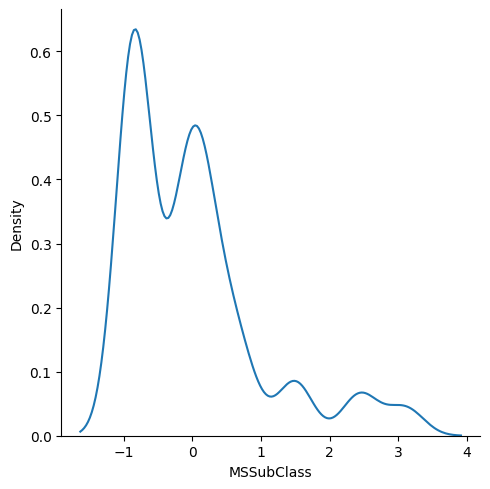

In [131]:
sns.displot(X_train.MSSubClass, kind='kde')

In [132]:
for i in zip(scaler.feature_names_in_, scaler.mean_, scaler.var_):
    print(i)

('GarageAge', 30.23731491712707, 620.0696417406062)
('HouseRemodAddAge', 24.959116022099447, 404.38396385946703)
('HouseAge', 39.62611049723757, 851.4295813358565)
('MSSubClass', 56.53591160220994, 1802.668599859589)
('LotFrontage', 68.92113812154696, 375.03435992014886)
('LotArea', 9952.040044198893, 24412186.777431965)
('OverallQual', 6.0044198895027625, 1.6508091938585512)
('OverallCond', 5.616574585635359, 1.2419352278623974)
('MasVnrArea', 92.71091712707181, 24405.5594494351)
('BsmtFinSF1', 448.88941436464086, 163839.28177656312)
('BsmtFinSF2', 56.168066298342545, 28599.928705100574)
('BsmtUnfSF', 552.2756906077348, 171614.29418805896)
('TotalBsmtSF', 1058.8928397790055, 128804.28407072014)
('1stFlrSF', 1143.8933370165746, 127146.79348698586)
('2ndFlrSF', 330.66994475138114, 175258.24554972068)
('LowQualFinSF', 5.67303867403314, 1849.9287659045758)
('GrLivArea', 1483.0943425414364, 234755.00667031357)
('BsmtFullBath', 0.44419889502762433, 0.268985684197674)
('BsmtHalfBath', 0.0596

In [133]:
X_test[num_cols[:-1]] = scaler.transform(X_test[num_cols[:-1]])

In [134]:
X_test.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

count      mean       std       min        0%        1%  \
GarageAge            389.0 -0.037493  0.950651 -1.214292 -1.214292 -1.214292   
HouseRemodAddAge     389.0 -0.043093  1.003536 -1.191445 -1.191445 -1.191445   
HouseAge             389.0 -0.036498  1.030330 -1.323752 -1.323752 -1.323752   
MSSubClass           389.0  0.070690  1.000344 -0.860522 -0.860522 -0.860522   
LotFrontage          389.0 -0.007705  1.016615 -2.474524 -2.474524 -2.474524   
LotArea              389.0  0.019664  1.060096 -1.715293 -1.715293 -1.626119   
OverallQual          389.0  0.000562  0.974280 -3.116673 -3.116673 -2.338364   
OverallCond          389.0  0.046487  1.045006 -3.245248 -3.245248 -2.347922   
MasVnrArea           389.0  0.008075  1.004991 -0.593453 -0.593453 -0.593453   
BsmtFinSF1           389.0 -0.025414  1.007188 -1.108997 -1.108997 -1.108997   
BsmtFinSF2           389.0 -0.118198  0.760388 -0.332129 -0.332129 -0.332129   
BsmtUnfSF            389.0 -0.021484  0.939963 -1.333151 -1.333151 -1.333151   
TotalBsmtSF          389.0 -0.098881  0.928530 -2.214845 -2.214845 -1.884496   
1stFlrSF             389.0 -0.077731  0.941809 -1.979641 -1.979641 -1.762128   
2ndFlrSF             389.0  0.141149  1.044501 -0.789870 -0.789870 -0.789870   
LowQualFinSF         389.0 -0.005025  0.994112 -0.131898 -0.131898 -0.131898   
GrLivArea            389.0  0.059798  1.037788 -2.156990 -2.156990 -1.634075   
BsmtFullBath         389.0 -0.038629  1.003092 -0.856471 -0.856471 -0.856471   
BsmtHalfBath         389.0 -0.002290  0.997013 -0.251902 -0.251902 -0.251902   
FullBath             389.0  0.030273  0.999581 -2.790206 -2.790206 -0.952406   
HalfBath             389.0  0.107033  1.025920 -0.753961 -0.753961 -0.753961   
BedroomAbvGr         389.0 -0.009821  1.012413 -3.661333 -3.661333 -2.387397   
KitchenAbvGr         389.0  0.037453  1.059235 -0.188692 -0.188692 -0.188692   
TotRmsAbvGrd         389.0  0.055191  1.059727 -2.239711 -2.239711 -1.663765   
Fireplaces           389.0 -0.002781  0.984218 -0.946626 -0.946626 -0.946626   
GarageCars           389.0  0.149177  0.916780 -2.294196 -2.294196 -2.294196   
GarageArea           389.0  0.132179  0.922696 -2.208810 -2.208810 -2.208810   
WoodDeckSF           389.0 -0.004364  1.043965 -0.772762 -0.772762 -0.772762   
OpenPorchSF          389.0  0.008384  1.003190 -0.711586 -0.711586 -0.711586   
EnclosedPorch        389.0 -0.026111  0.961688 -0.389740 -0.389740 -0.389740   
3SsnPorch            389.0  0.106835  1.394432 -0.105432 -0.105432 -0.105432   
ScreenPorch          389.0  0.059895  1.089234 -0.275651 -0.275651 -0.275651   
MiscVal              389.0  0.115970  1.281349 -0.174562 -0.174562 -0.174562   
MoSold               389.0 -0.090698  0.983267 -1.972992 -1.972992 -1.972992   
MSZoning.RM          389.0  0.174807  0.380291  0.000000  0.000000  0.000000   
MSZoning.other       389.0  0.051414  0.221125  0.000000  0.000000  0.000000   
LotShape.Reg         389.0  0.642674  0.479829  0.000000  0.000000  0.000000   
LotShape.other       389.0  0.046272  0.210345  0.000000  0.000000  0.000000   
LotConfig.Inside     389.0  0.714653  0.452161  0.000000  0.000000  0.000000   
LotConfig.other      389.0  0.107969  0.310741  0.000000  0.000000  0.000000   
Condition1.other     389.0  0.125964  0.332236  0.000000  0.000000  0.000000   
BldgType.other       389.0  0.169666  0.375822  0.000000  0.000000  0.000000   
HouseStyle.1Story    389.0  0.444730  0.497576  0.000000  0.000000  0.000000   
HouseStyle.2Story    389.0  0.344473  0.475808  0.000000  0.000000  0.000000   
HouseStyle.other     389.0  0.107969  0.310741  0.000000  0.000000  0.000000   
RoofStyle.Hip        389.0  0.177378  0.382480  0.000000  0.000000  0.000000   
RoofStyle.other      389.0  0.033419  0.179960  0.000000  0.000000  0.000000   
Exterior1st.MetalSd  389.0  0.177378  0.382480  0.000000  0.000000  0.000000   
Exterior1st.VinylSd  389.0  0.316195  0.465589  0.000000  0.000000  0.000000   
Exterior1st.Wd Sdng  

In [135]:
cols = X_train.columns

In [136]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [137]:
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     85.89
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:26:39   Log-Likelihood:                -10348.
No. Observations:                 905   AIC:                         2.087e+04
Df Residuals:                     817   BIC:                         2.130e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.63e+05   8

In [138]:
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred = lm.predict(X_train_sm)
print('training set: ', r2_score(y_train, y_train_pred), np.sqrt(mean_squared_error(np.log(y_train_pred), np.log(y_train))))
y_test_pred = lm.predict(X_test_sm)
print('testing set: ', r2_score(y_test, y_test_pred), np.sqrt(mean_squared_error(np.log(y_test_pred), np.log(y_test))))

training set:  0.901436878086392 0.1353485671208312
testing set:  0.8353318904657512 0.17591281690908692


In [139]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, step=15)
rfe = rfe.fit(X_train, y_train)
li = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
li

[('GarageAge', False, 3),
 ('HouseRemodAddAge', False, 2),
 ('HouseAge', True, 1),
 ('MSSubClass', False, 3),
 ('LotFrontage', False, 4),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 4),
 ('FullBath', False, 2),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 2),
 ('GarageCars', False, 2),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 3),
 ('MiscVal', False, 3),
 ('MoSold', False, 4),
 ('MSZoning.RM', True, 1),
 ('MSZoning.other', False, 4),
 ('LotShape.Reg', False, 3),
 ('LotSh

In [140]:
cols = list(X_train.columns[rfe.support_])
cols

['HouseAge',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSZoning.RM',
 'Condition1.other',
 'RoofStyle.other',
 'Exterior1st.VinylSd',
 'Exterior1st.Wd Sdng',
 'Exterior1st.other',
 'Exterior2nd.VinylSd',
 'Exterior2nd.Wd Sdng',
 'MasVnrType.None',
 'ExterQual.TA',
 'ExterQual.other',
 'ExterCond.other',
 'Foundation.CBlock',
 'Foundation.other',
 'BsmtQual.TA',
 'BsmtQual.other',
 'BsmtCond.Gd',
 'BsmtCond.Po',
 'BsmtCond.TA',
 'BsmtExposure.other',
 'BsmtFinType1.GLQ',
 'BsmtFinType1.Unf',
 'BsmtFinType2.other',
 'KitchenQual.other',
 'GarageType.Detchd',
 'GarageFinish.None',
 'SaleCondition.other']

In [141]:
X_train_sm = sm.add_constant(X_train[cols])
X_test_sm = sm.add_constant(X_test[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:26:39   Log-Likelihood:                -10375.
No. Observations:                 905   AIC:                         2.084e+04
Df Residuals:                     861   BIC:                         2.105e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.599e+05   5

In [142]:
def evaluation_score():
    y_train_pred = lm.predict(X_train_sm)
    print('training set: ', r2_score(y_train, y_train_pred), np.sqrt(mean_squared_error(np.log(y_train_pred), np.log(y_train))))
    y_test_pred = lm.predict(X_test_sm)
    print('testing set: ', r2_score(y_test, y_test_pred), np.sqrt(mean_squared_error(np.log(y_test_pred), np.log(y_test))))

In [143]:
evaluation_score()

training set:  0.8953107285601821 0.14278704350875898
testing set:  0.8352799325502469 0.16588031193468988


In [144]:
analyze_df = X_train_sm.copy(deep=True)

In [145]:
analyze_df['y_train'] = y_train
analyze_df['y_train_pred'] = y_train_pred
analyze_df['loss'] = y_train - y_train_pred

In [146]:
analyze_df.sort_values(by=['loss'], ascending=False)

const  HouseAge   LotArea  OverallQual  OverallCond  MasVnrArea  \
691     1.0 -0.912501  2.344316     2.331484     0.344058    3.930983   
1169    1.0 -0.981043  5.223365     2.331484    -0.553269    3.930983   
774     1.0 -1.323752  0.865022     1.553176    -0.553269    1.806965   
678     1.0 -1.323752  0.382920     1.553176    -0.553269    2.376664   
322     1.0 -0.638334  0.086616     0.774868    -0.553269    0.507539   
496     1.0 -0.843959  0.554550     1.553176    -0.553269   -0.593453   
769     1.0 -1.118126  5.410028     1.553176    -0.553269    3.266419   
218     1.0  1.006670  1.155254     0.774868     3.036038    1.403695   
377     1.0 -1.255210  0.241043     1.553176    -0.553269   -0.593453   
440     1.0 -1.323752  1.108906     2.331484    -0.553269    0.686770   
885     1.0 -1.049585 -0.978176     2.331484    -0.553269   -0.209386   
608     1.0  1.143754  0.448496     1.553176     0.344058   -0.593453   
313     1.0  0.149897  5.410028     0.774868    -0.553269   -0.593453   
231     1.0 -0.878230  1.049605     1.553176    -0.553269    2.645511   
326     1.0 -0.843959  0.180932     1.553176    -0.553269   -0.593453   
970     1.0  0.595419  0.171622    -1.560056    -1.450595   -0.593453   
328     1.0  1.829172  0.391826    -0.003440     0.344058   -0.593453   
1212    1.0  0.972399 -0.123873    -1.560056     0.344058   -0.593453   
990     1.0 -1.049585 -0.101205     1.553176    -0.553269    2.114218   
1122    1.0  0.458335 -0.207664    -1.560056    -2.347922   -0.593453   
1310    1.0  0.389794  1.527658     0.774868     2.138711   -0.593453   
142     1.0  0.629690 -0.289836    -0.781748    -1.450595   -0.593453   
170     1.0  0.903857  0.486951    -0.781748     0.344058   -0.593453   
153     1.0  0.286981  0.718084    -0.003440     1.241384   -0.593453   
907     1.0  1.040941  0.313297     0.774868     1.241384   -0.593453   
1244    1.0  1.280837  0.300142     1.553176     1.241384   -0.593453   
1267    1.0 -1.289481  0.660200     2.331484    -0.553269   -0.593453   
224     1.0 -1.152397  0.712417     2.331484    -0.553269    3.930983   
48      1.0  1.692088 -1.112363    -1.560056    -0.553269   -0.593453   
53      1.0 -0.501250  5.410028     2.331484    -0.553269   -0.593453   
277     1.0  0.663961  1.859179    -1.560056    -0.553269   -0.593453   
729     1.0  1.520734 -0.751293    -1.560056    -0.553269   -0.593453   
681     1.0  1.280837 -1.103458    -0.781748    -0.553269   -0.593453   
591     1.0 -1.323752  0.713632     2.331484    -0.553269    2.095015   
512     1.0  0.286981 -0.172447    -0.781748    -0.553269   -0.593453   
426     1.0 -0.672605  0.576409     0.774868    -0.553269    0.334708   
559     1.0 -1.255210 -1.367379     0.774868    -0.553269   -0.478233   
707     1.0 -1.255210 -0.751293     1.553176    -0.553269    0.533143   
747     1.0  2.551260  0.353776     0.774868     1.241384   -0.593453   
738     1.0 -0.604063  0.171622    -0.781748    -0.553269   -0.593453   
1360    1.0  1.623546 -0.022271    -0.781748     0.344058   -0.593453   
743     1.0  0.218439  0.593815    -0.781748     0.344058   -0.593453   
1239    1.0 -1.323752 -0.185198     1.553176    -0.553269   -0.388618   
165     1.0  0.972399  0.031161    -0.781748     1.241384   -0.593453   
680     1.0 -0.329896 -0.392652    -0.003440    -0.553269   -0.593453   
696     1.0  1.555004 -0.799867    -0.781748     1.241384   -0.593453   
1253    1.0 -0.227083  1.536159     0.774868     1.241384   -0.593453   
397     1.0  0.184168 -0.478062    -0.781748    -0.553269    1.250068   
1178    1.0  1.657817 -0.459644    -0.781748     0.344058   -0.593453   
365     1.0  1.692088  0.149358    -0.781748     1.241384   -0.593453   
1215    1.0  0.047084 -0.578449    -0.781748    -0.553269   -0.593453   
92      1.0  1.657817  0.689749    -0.781748     1.241384   -0.593453   
995     1.0  0.698232 -1.060550    -1.560056     1.241384   -0.593453   
481     1.0 -1.255210  0.383325     2.331484    -0.553269    3.0

In [147]:
analyze_test_df = X_test_sm.copy(deep=True)

In [148]:
analyze_test_df['y_test'] = y_test
analyze_test_df['y_test_pred'] = y_test_pred
analyze_test_df['loss'] = y_test - y_test_pred

In [149]:
analyze_test_df.sort_values(by=['loss'], ascending=False)

const  HouseAge   LotArea  OverallQual  OverallCond  MasVnrArea  \
1182    1.0 -0.981043  1.147766     2.331484    -0.553269   -0.593453   
185     1.0  2.548861  2.630703     2.331484     3.036038   -0.593453   
1423    1.0  0.012814  1.970900    -0.003440     1.241384   -0.593453   
190     1.0  1.212295  0.125071     1.553176     2.138711   -0.593453   
107     1.0  0.698232 -0.799867    -0.781748    -0.553269   -0.593453   
764     1.0 -0.981043 -0.081573     1.553176    -0.553269   -0.593453   
386     1.0  1.931984 -0.312099    -0.781748    -2.347922   -0.593453   
703     1.0  2.411777 -0.469966    -0.781748     3.036038   -0.593453   
1100    1.0  1.692088 -0.314123    -3.116673    -0.553269   -0.593453   
393     1.0  0.869586 -0.507206    -1.560056    -0.553269   -0.593453   
336     1.0 -1.289481  0.851057     2.331484    -0.553269    0.686770   
1024    1.0 -0.261354  1.122466     1.553176     0.344058   -0.593453   
68      1.0  0.869586 -1.081599    -1.560056     0.344058   -0.593453   
344     1.0 -0.192812 -1.489625    -0.781748    -2.347922   -0.593453   
549     1.0 -1.152397 -0.116789     0.774868    -0.553269   -0.593453   
1075    1.0  0.938128  0.642187     0.774868     0.344058   -0.593453   
546     1.0  1.520734 -0.245916    -0.003440     1.241384   -0.593453   
114     1.0  0.766774 -0.545054    -0.003440     2.138711   -0.593453   
407     1.0  1.829172  1.138253    -0.003440     1.241384   -0.593453   
175     1.0  0.595419  0.538966    -0.003440     1.241384   -0.593453   
661     1.0 -0.843959  5.410028     1.553176     1.241384    2.786335   
268     1.0  0.972399 -0.617713    -0.781748     0.344058   -0.593453   
654     1.0 -0.912501  0.098153     1.553176     0.344058    3.631283   
454     1.0 -0.329896 -0.132576    -0.781748    -0.553269   -0.593453   
1039    1.0 -0.021457 -1.715293    -1.560056    -1.450595   -0.593453   
574     1.0 -0.124270  0.110904    -0.781748     1.241384   -0.068562   
358     1.0  0.286981 -0.611641    -0.781748    -1.450595    0.174681   
1065    1.0 -0.878230  0.819281     0.774868    -0.553269   -0.593453   
225     1.0 -0.055728 -1.674208    -0.781748    -0.553269    0.315505   
420     1.0 -0.981043 -0.585330     0.774868    -0.553269    0.686770   
1345    1.0  1.623546 -0.799867    -1.560056    -1.450595   -0.593453   
1026    1.0  0.355523 -0.131969    -0.781748    -0.553269    1.480508   
129     1.0  0.286981 -0.198151    -0.781748     1.241384   -0.049358   
718     1.0 -0.843959  0.119404     0.774868    -0.553269    3.573673   
399     1.0 -1.255210 -0.369781     0.774868    -0.553269    0.046658   
74      1.0  1.897714 -0.842370    -2.338364     0.344058   -0.593453   
477     1.0 -1.323752  0.757146     2.331484    -0.553269    3.930983   
76      1.0  0.424064 -0.298943    -1.560056     1.241384   -0.593453   
607     1.0  0.629690 -0.435559    -0.781748     2.138711   -0.593453   
1389    1.0  0.903857 -0.799867    -0.003440     0.344058   -0.593453   
1313    1.0 -0.981043  0.975934     2.331484    -0.553269    0.462731   
372     1.0 -0.466979 -0.562055    -0.003440    -0.553269   -0.593453   
296     1.0  0.595419  0.760587    -0.781748    -0.553269   -0.593453   
449     1.0  0.663961 -0.799867    -2.338364     1.241384   -0.593453   
131     1.0 -1.049585  0.459830    -0.003440    -0.553269   -0.337409   
27      1.0 -1.255210  0.308844     1.553176    -0.553269    0.686770   
1340    1.0 -0.124270 -0.335577    -1.560056    -0.553269   -0.593453   
786     1.0  1.897714  0.171622    -0.781748     0.344058   -0.593453   
871     1.0 -0.946772 -0.243285    -0.003440    -0.553269    0.149076   
1221    1.0  0.012814 -0.344482    -0.781748    -0.553269   -0.593453   
999     1.0 -1.220939 -0.645644     0.774868    -0.553269   -0.439826   
321     1.0 -1.255210  0.434531     1.553176    -0.553269    1.890179   
226     1.0 -0.946772 -0.000413     0.774868    -0.553269    1.262870   
438     1.0  1.863443 -1.147984    -0.781748     0.344058   -0.5

In [151]:
X_train = analyze_df.loc[-((analyze_df.y_train==755000) | (analyze_df.y_train==625000))]
y_train = X_train.y_train
X_train.drop(columns=['y_train', 'y_train_pred', 'loss'], axis=1, inplace=True)

/tmp/ipykernel_32/822250460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['y_train', 'y_train_pred', 'loss'], axis=1, inplace=True)


In [152]:
X_train_sm = sm.add_constant(X_train[cols])
X_test_sm = sm.add_constant(X_test[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:27:48   Log-Likelihood:                -10281.
No. Observations:                 903   AIC:                         2.065e+04
Df Residuals:                     859   BIC:                         2.086e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.606e+05   5

In [156]:
y_train_pred = lm.predict(X_train_sm)
print('training set: ', r2_score(y_train, y_train_pred), np.sqrt(mean_squared_error(np.log(y_train_pred), np.log(y_train))))
y_test_pred = lm.predict(X_test_sm)
print('testing set: ', r2_score(y_test, y_test_pred), np.sqrt(mean_squared_error(np.log(y_test_pred), np.log(y_test))))

training set:  0.8988504436906298 0.13462707234590754
testing set:  0.8347185775413439 0.15747499474495152


In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X_train_sm.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif = vif.sort_values(by='vif', ascending=False)

In [158]:
vif

features        vif
12            GrLivArea  77.263898
8             BsmtUnfSF  68.943564
6            BsmtFinSF1  64.429281
11             2ndFlrSF  60.785642
0                 const  55.220879
9           TotalBsmtSF  54.744284
10             1stFlrSF  47.044225
20  Exterior1st.VinylSd  30.294093
23  Exterior2nd.VinylSd  29.399677
7            BsmtFinSF2  17.047701
15         TotRmsAbvGrd   5.034014
1              HouseAge   4.702527
21  Exterior1st.Wd Sdng   4.450049
24  Exterior2nd.Wd Sdng   3.891913
39   BsmtFinType2.other   3.542081
3           OverallQual   3.250888
38     BsmtFinType1.Unf   2.873959
35          BsmtCond.TA   2.752704
25      MasVnrType.None   2.749603
16           GarageArea   2.710634
33          BsmtCond.Gd   2.688511
5            MasVnrArea   2.660871
13         BedroomAbvGr   2.536553
26         ExterQual.TA   2.485475
31          BsmtQual.TA   2.482204
29    Foundation.CBlock   2.078049
37     BsmtFinType1.GLQ   2.019809
42    GarageFinish.None   1.945634
41    GarageType.Detchd   1.830901
2               LotArea   1.701465
22    Exterior1st.other   1.542163
4           OverallCond   1.518830
17          MSZoning.RM   1.488006
32       BsmtQual.other   1.469732
27      ExterQual.other   1.424022
40    KitchenQual.other   1.384828
14         KitchenAbvGr   1.339651
28      ExterCond.other   1.281029
34          BsmtCond.Po   1.247979
36   BsmtExposure.other   1.229403
19      RoofStyle.other   1.124753
30     Foundation.other   1.123419
18     Condition1.other   1.112767
43  SaleCondition.other   1.078345

In [159]:
def delete_col(i):
    global cols
    cols.remove(i)
#     X_train_sm.drop(i, inplace=True, axis=1)
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    vif = pd.DataFrame()
    X = X_train[cols]
    vif['features'] = cols
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif = vif.sort_values(by='vif', ascending=False)
    print(vif)

In [160]:
delete_col('BsmtCond.Gd')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:32   Log-Likelihood:                -10281.
No. Observations:                 903   AIC:                         2.065e+04
Df Residuals:                     860   BIC:                         2.085e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.597e+05   4

In [161]:
delete_col('ExterCond.other')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:47   Log-Likelihood:                -10281.
No. Observations:                 903   AIC:                         2.065e+04
Df Residuals:                     861   BIC:                         2.085e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.598e+05   4

In [162]:
delete_col('BsmtCond.Po')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:48   Log-Likelihood:                -10281.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     862   BIC:                         2.084e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.595e+05   4

In [163]:
delete_col('Exterior2nd.VinylSd')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:48   Log-Likelihood:                -10282.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     863   BIC:                         2.084e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.595e+05   4

In [164]:
delete_col('RoofStyle.other')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     201.6
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:49   Log-Likelihood:                -10282.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     864   BIC:                         2.083e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.594e+05   4

In [165]:
delete_col('GarageType.Detchd')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:49   Log-Likelihood:                -10282.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     865   BIC:                         2.082e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  1.6e+05   4

In [166]:
delete_col('GrLivArea')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     212.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:50   Log-Likelihood:                -10284.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     866   BIC:                         2.082e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.602e+05   4

In [167]:
delete_col('Exterior1st.VinylSd')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     218.3
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:50   Log-Likelihood:                -10285.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     867   BIC:                         2.081e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.621e+05   3

In [168]:
delete_col('Exterior1st.other')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:51   Log-Likelihood:                -10286.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     868   BIC:                         2.081e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.62e+05   3

In [169]:
delete_col('Foundation.other')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:51   Log-Likelihood:                -10287.
No. Observations:                 903   AIC:                         2.064e+04
Df Residuals:                     869   BIC:                         2.080e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.616e+05   3

In [170]:
delete_col('BsmtUnfSF')

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     231.1
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:51   Log-Likelihood:                -10299.
No. Observations:                 903   AIC:                         2.066e+04
Df Residuals:                     870   BIC:                         2.082e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.617e+05   3

In [171]:
X_train_sm = sm.add_constant(X_train[cols])
X_test_sm = sm.add_constant(X_test[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     231.1
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:28:52   Log-Likelihood:                -10299.
No. Observations:                 903   AIC:                         2.066e+04
Df Residuals:                     870   BIC:                         2.082e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.617e+05   3

In [172]:
evaluation_score()

training set:  0.8947363792745155 0.13695496015454778
testing set:  0.8450126462515433 0.15576684367527624


In [173]:
cols

['HouseAge',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSZoning.RM',
 'Condition1.other',
 'Exterior1st.Wd Sdng',
 'Exterior2nd.Wd Sdng',
 'MasVnrType.None',
 'ExterQual.TA',
 'ExterQual.other',
 'Foundation.CBlock',
 'BsmtQual.TA',
 'BsmtQual.other',
 'BsmtCond.TA',
 'BsmtExposure.other',
 'BsmtFinType1.GLQ',
 'BsmtFinType1.Unf',
 'BsmtFinType2.other',
 'KitchenQual.other',
 'GarageFinish.None',
 'SaleCondition.other']

In [175]:
cols

['HouseAge',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSZoning.RM',
 'Condition1.other',
 'Exterior1st.Wd Sdng',
 'Exterior2nd.Wd Sdng',
 'MasVnrType.None',
 'ExterQual.TA',
 'ExterQual.other',
 'Foundation.CBlock',
 'BsmtQual.TA',
 'BsmtQual.other',
 'BsmtCond.TA',
 'BsmtExposure.other',
 'BsmtFinType1.GLQ',
 'BsmtFinType1.Unf',
 'BsmtFinType2.other',
 'KitchenQual.other',
 'GarageFinish.None',
 'SaleCondition.other']

In [176]:
test_dummies_df[cols]

HouseAge     LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0      49.0000  11622.0000            5            6      0.0000    468.0000   
2      13.0000  13830.0000            5            5      0.0000    791.0000   
3      12.0000   9978.0000            6            6     20.0000    602.0000   
4      18.0000   5005.0000            8            5      0.0000    263.0000   
5      17.0000  10000.0000            6            5      0.0000      0.0000   
6      18.0000   7980.0000            6            7      0.0000    935.0000   
7      12.0000   8402.0000            6            5      0.0000      0.0000   
8      20.0000  10176.0000            7            5      0.0000    637.0000   
9      40.0000   8400.0000            4            5      0.0000    804.0000   
10     11.0000   5858.0000            7            5      0.0000   1051.0000   
11     39.0000   1680.0000            6            5    504.0000    156.0000   
12     39.0000   1680.0000            5            5    492.0000    300.0000   
13     35.0000   2280.0000            6            6      0.0000    514.0000   
14     35.0000   2280.0000            7            6      0.0000      0.0000   
15      1.0000  12858.0000            9            5    162.0000      0.0000   
16      1.0000  12883.0000            8            5    256.0000      0.0000   
17      5.0000  11520.0000            9            5    615.0000    110.0000   
18      5.0000  14122.0000            8            5    240.0000     28.0000   
19      7.0000  14300.0000            9            5    705.1274   1373.0000   
20      8.0000  13650.0000            8            5    232.0000    578.0000   
21      4.0000   7132.0000            8            5    178.0000     24.0000   
22      5.0000  18494.0000            6            5      0.0000      0.0000   
23      4.0000   3203.0000            7            5     14.0000     16.0000   
24      6.0000  13300.0000            7            5      0.0000    326.0000   
25      6.0000   8577.0000            7            5      0.0000      0.0000   
26     12.0000  17433.0000            8            5    114.0000      0.0000   
27      5.0000   8987.0000            8            5    226.0000      0.0000   
28      1.0000   9215.0000            7            5      0.0000      0.0000   
29      5.0000  10440.0000            6            5      0.0000   1414.0000   
30      6.0000  11920.0000            7            5    122.0000      0.0000   
31     90.0000   9800.0000            5            5      0.0000      0.0000   
32     36.0000  15410.0000            6            6    250.0000    126.0000   
33     17.0000  13143.0000            8            5    504.0000    250.0000   
34     18.0000  11134.0000            8            5    180.0000   1129.0000   
35      6.0000   4835.0000            7            5      0.0000   1298.0000   
36      6.0000   3515.0000            7            5      0.0000      0.0000   
37      6.0000   3215.0000            7            5    120.0000    280.0000   
38      6.0000   2544.0000            7            5      0.0000    368.0000   
39      5.0000   2544.0000            6            5    216.0000    376.0000   
40     10.0000   2980.0000            6            5    705.1274    466.0000   
41      7.0000   2403.0000            7            5      0.0000    244.0000   
42      0.0000  12853.0000            8            5      0.0000   1032.0000   
43     10.0000   7379.0000            8            5      0.0000    484.0000   
44      8.0000   8000.0000            7            5      0.0000    833.0000   
45     43.0000  10456.0000            6            6    120.0000    506.0000   
46     17.0000  10791.0000            6            5      0.0000   1137.0000   
47     32.0000  18837.0000            6            5      0.0000    687.0000   
48     39.0000   9600.0000            6            6      0.0000    329.0000   
49     44.0000   9600.0000            5            5    172.0000    698.0000   
50    

In [179]:
test_pred_vals = lm.predict(sm.add_constant(test_dummies_df[cols]))

In [174]:
housing_test_df = pd.read_csv('/data/test.csv')

In [180]:
test_pred_vals.shape

(1458,)

In [181]:
housing_test_df.shape

(1459, 80)